<a href="https://colab.research.google.com/github/fedhere/PUS2024/blob/main/classDemos/missing_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
stud_res = pd.read_csv("https://raw.githubusercontent.com/fedhere/PUS2024/refs/heads/main/data/StudentPerformanceFactors_modified.csv")


In [2]:
stud_res.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6527.000000,6521.000000,6526.000000,6528.000000,6523.000000,6518.000000,6525.000000
mean,19.984832,79.990799,7.028042,75.067096,1.493791,2.966247,67.240307
std,5.993324,11.546369,1.469583,14.397116,1.231580,1.031094,3.882296
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


In [16]:
stud_res.select_dtypes("number")

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
0,23.0,84.0,7.0,73.0,0.0,3.0,67.0
1,19.0,64.0,8.0,59.0,2.0,4.0,61.0
2,24.0,98.0,7.0,91.0,2.0,4.0,74.0
3,29.0,89.0,8.0,98.0,1.0,4.0,71.0
4,NaN,92.0,6.0,65.0,3.0,4.0,70.0
...,...,...,...,...,...,...,...
6602,25.0,69.0,7.0,76.0,1.0,2.0,68.0
6603,23.0,76.0,8.0,81.0,3.0,2.0,69.0
6604,NaN,90.0,6.0,65.0,3.0,2.0,68.0
6605,10.0,86.0,6.0,91.0,2.0,3.0,68.0


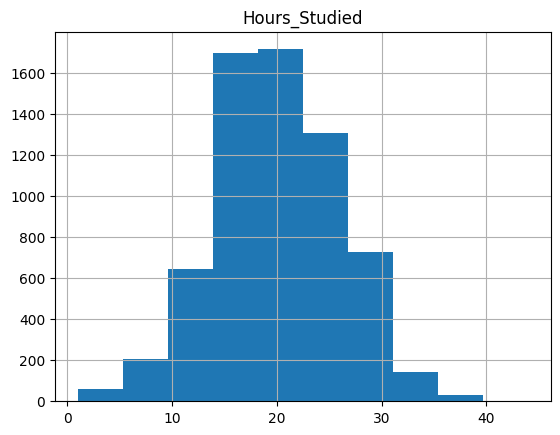

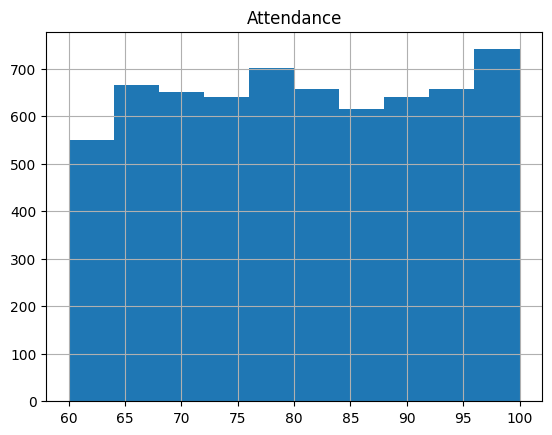

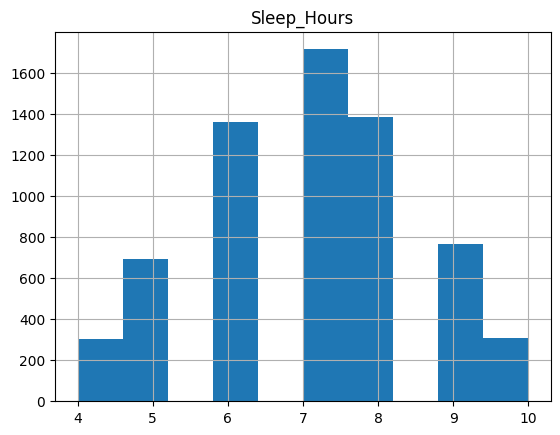

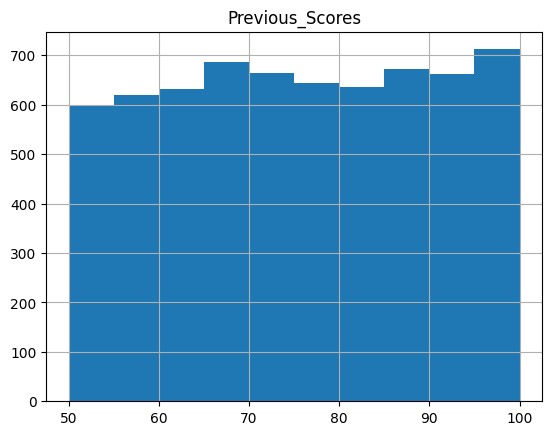

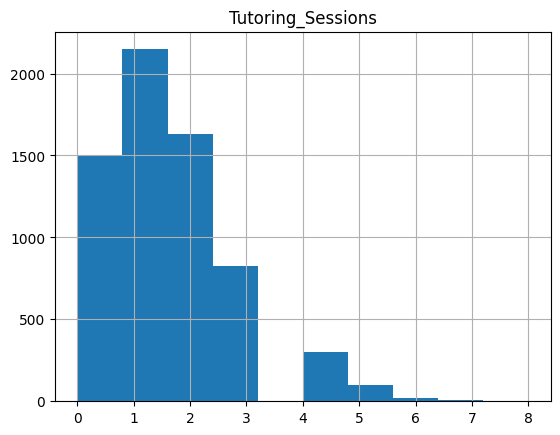

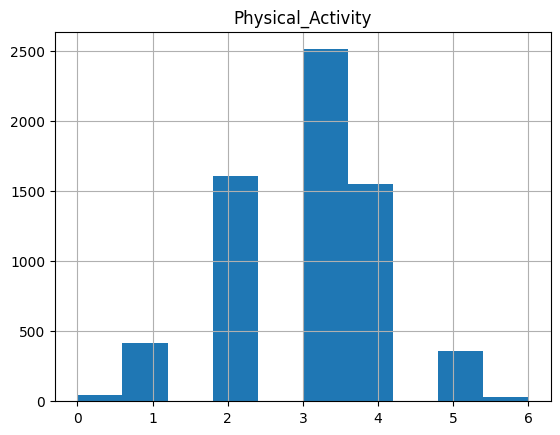

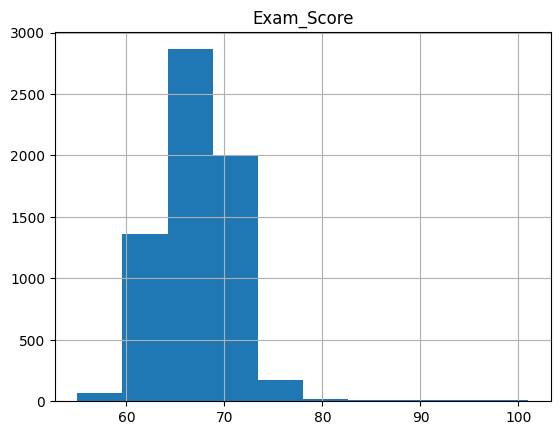

In [17]:
for c in stud_res.select_dtypes("number").columns:

  stud_res[[c]].hist()

In [3]:
stud_res.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [4]:
stud_res.shape

(6607, 20)

In [6]:
stud_res.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23.0,84.0,Low,High,No,7.0,73.0,Low,Yes,0.0,Low,Medium,Public,Positive,3.0,No,High School,Near,Male,67.0
1,19.0,64.0,Low,Medium,No,8.0,59.0,Low,Yes,2.0,Medium,Medium,Public,Negative,4.0,No,College,Moderate,Female,61.0
2,24.0,98.0,Medium,Medium,Yes,7.0,91.0,Medium,Yes,2.0,Medium,Medium,Public,Neutral,4.0,No,Postgraduate,Near,Male,74.0
3,29.0,89.0,Low,Medium,Yes,8.0,98.0,Medium,Yes,1.0,Medium,Medium,Public,Negative,4.0,No,High School,Moderate,Male,71.0
4,NaN,92.0,Medium,Medium,Yes,6.0,65.0,Medium,Yes,3.0,Medium,High,Public,Neutral,4.0,No,College,Near,Female,70.0


In [9]:
ohe_parentalinvolvement = pd.get_dummies(stud_res['Parental_Involvement']) #one hot encoding
ohe_parentalinvolvement

,High,Low,Medium
0,False,True,False
1,False,True,False
2,False,False,True
3,False,True,False
4,False,False,True
...,...,...,...
6602,True,False,False
6603,True,False,False
6604,False,False,True
6605,True,False,False


In [11]:
stud_res_ohe = stud_res.merge(ohe_parentalinvolvement, left_index=True, right_index=True).drop(columns=['Parental_Involvement'])

In [12]:
stud_res_ohe

,Hours_Studied,Attendance,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,...,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,High,Low,Medium
0,23.0,84.0,High,No,7.0,73.0,Low,Yes,0.0,Low,...,Positive,3.0,No,High School,Near,Male,67.0,False,True,False
1,19.0,64.0,Medium,No,8.0,59.0,Low,Yes,2.0,Medium,...,Negative,4.0,No,College,Moderate,Female,61.0,False,True,False
2,24.0,98.0,Medium,Yes,7.0,91.0,Medium,Yes,2.0,Medium,...,Neutral,4.0,No,Postgraduate,Near,Male,74.0,False,False,True
3,29.0,89.0,Medium,Yes,8.0,98.0,Medium,Yes,1.0,Medium,...,Negative,4.0,No,High School,Moderate,Male,71.0,False,True,False
4,NaN,92.0,Medium,Yes,6.0,65.0,Medium,Yes,3.0,Medium,...,Neutral,4.0,No,College,Near,Female,70.0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25.0,69.0,Medium,No,7.0,76.0,Medium,Yes,1.0,High,...,Positive,2.0,No,High School,Near,Female,68.0,True,False,False
6603,23.0,76.0,Medium,No,8.0,81.0,Medium,Yes,3.0,Low,...,Positive,2.0,No,High School,Near,Female,69.0,True,False,False
6604,NaN,90.0,Low,Yes,6.0,65.0,Low,Yes,3.0,Low,...,Negative,2.0,No,Postgraduate,Near,Female,68.0,False,False,True
6605,10.0,86.0,High,Yes,6.0,91.0,High,Yes,2.0,Low,...,Positive,3.0,No,High School,Far,Female,68.0,True,False,False


In [18]:
stud_res_numerical = stud_res.select_dtypes("number")
stud_res_numerical

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
0,23.0,84.0,7.0,73.0,0.0,3.0,67.0
1,19.0,64.0,8.0,59.0,2.0,4.0,61.0
2,24.0,98.0,7.0,91.0,2.0,4.0,74.0
3,29.0,89.0,8.0,98.0,1.0,4.0,71.0
4,NaN,92.0,6.0,65.0,3.0,4.0,70.0
...,...,...,...,...,...,...,...
6602,25.0,69.0,7.0,76.0,1.0,2.0,68.0
6603,23.0,76.0,8.0,81.0,3.0,2.0,69.0
6604,NaN,90.0,6.0,65.0,3.0,2.0,68.0
6605,10.0,86.0,6.0,91.0,2.0,3.0,68.0


In [20]:
stud_res_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hours_Studied      6527 non-null   float64
 1   Attendance         6521 non-null   float64
 2   Sleep_Hours        6526 non-null   float64
 3   Previous_Scores    6528 non-null   float64
 4   Tutoring_Sessions  6523 non-null   float64
 5   Physical_Activity  6518 non-null   float64
 6   Exam_Score         6525 non-null   float64
dtypes: float64(7)
memory usage: 361.4 KB


In [22]:
stud_res_numerical.isna().sum()

,0
Hours_Studied,80
Attendance,86
Sleep_Hours,81
Previous_Scores,79
Tutoring_Sessions,84
Physical_Activity,89
Exam_Score,82


<Axes: >

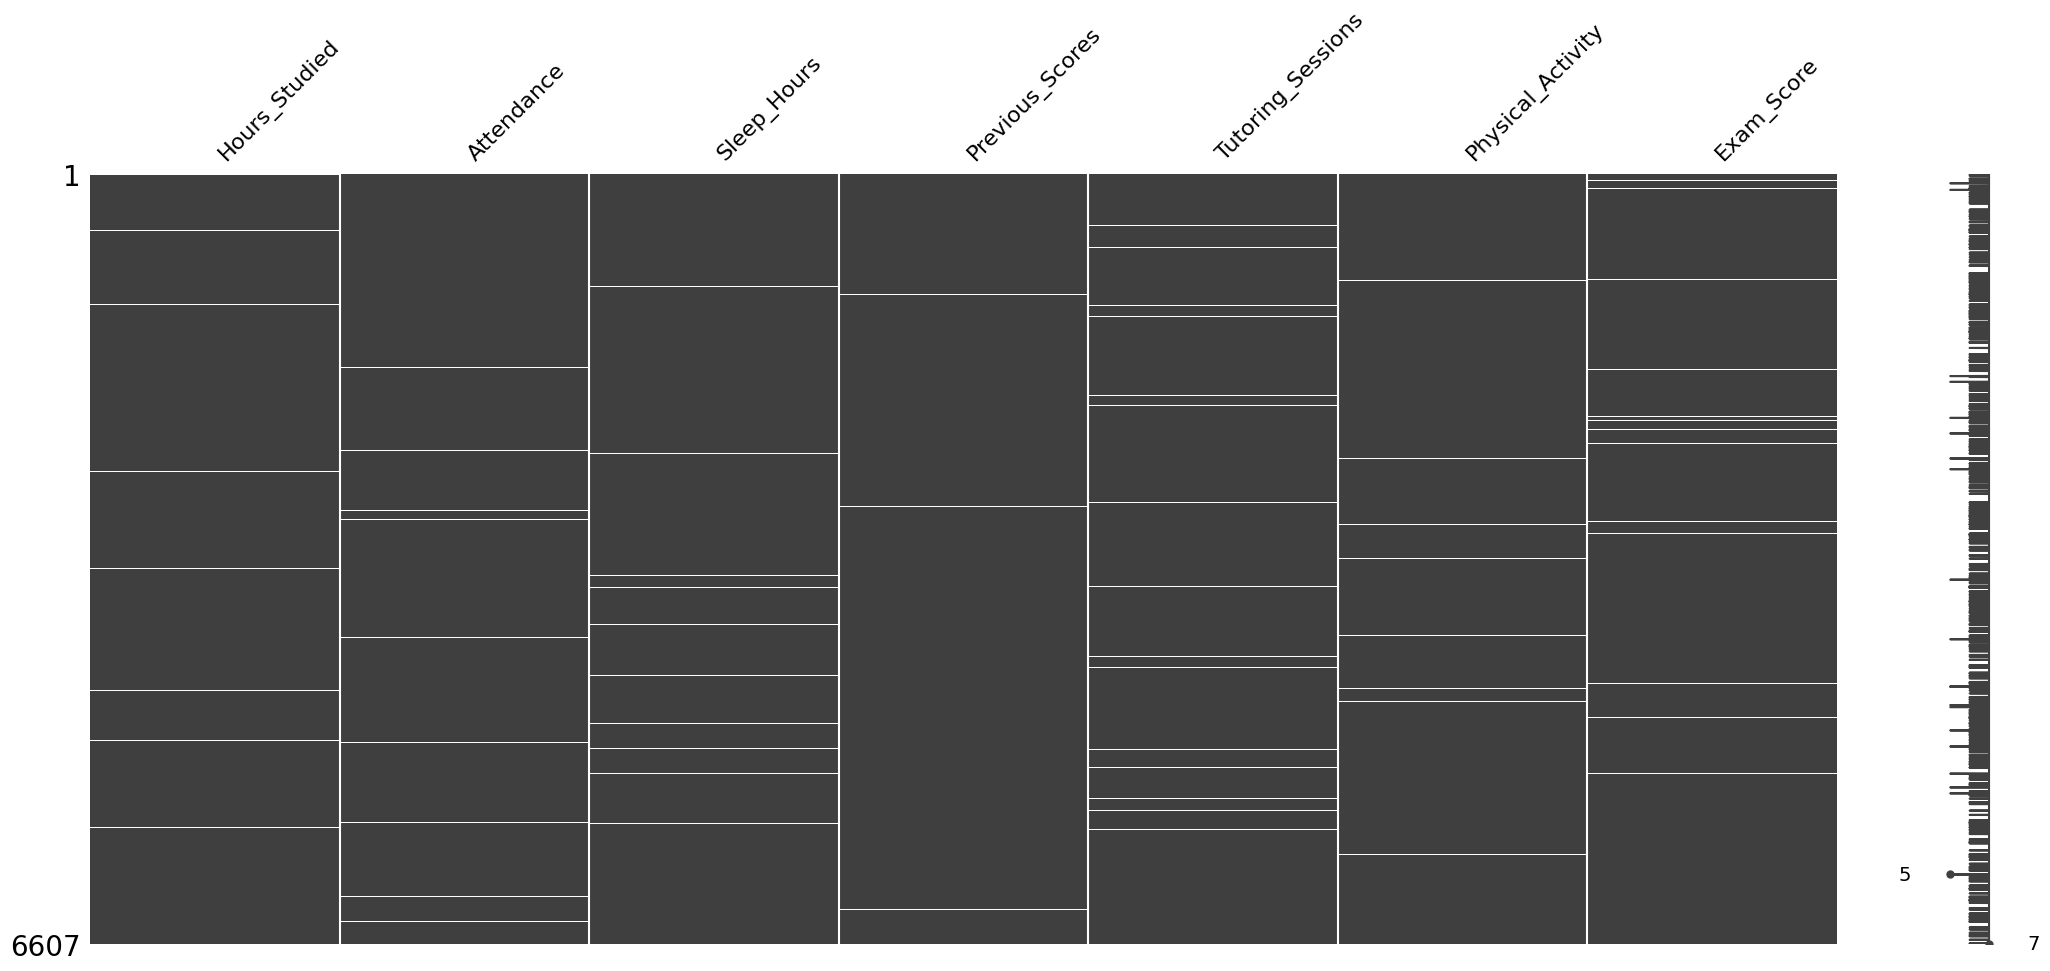

In [23]:
import missingno as msno
msno.matrix(stud_res_numerical)

In [26]:
stud_res_numerical.dropna(axis=1)

""
0
1
2
3
4
...
6602
6603
6604
6605


In [34]:
strud_res_medianfilled = stud_res_numerical.fillna(stud_res_numerical.median())
strud_res_medianfilled

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
0,23.0,84.0,7.0,73.0,0.0,3.0,67.0
1,19.0,64.0,8.0,59.0,2.0,4.0,61.0
2,24.0,98.0,7.0,91.0,2.0,4.0,74.0
3,29.0,89.0,8.0,98.0,1.0,4.0,71.0
4,20.0,92.0,6.0,65.0,3.0,4.0,70.0
...,...,...,...,...,...,...,...
6602,25.0,69.0,7.0,76.0,1.0,2.0,68.0
6603,23.0,76.0,8.0,81.0,3.0,2.0,69.0
6604,20.0,90.0,6.0,65.0,3.0,2.0,68.0
6605,10.0,86.0,6.0,91.0,2.0,3.0,68.0


In [40]:
import numpy as np
np.random.seed(302)
data = np.random.randn(1000)
print("meand: {:.2} std: {:.2}".format(data.mean(), data.std()))

meand: -0.006 std: 1.0


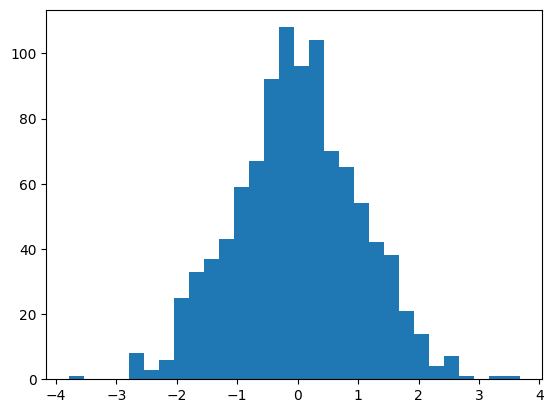

In [41]:
import pylab as plt
plt.hist(data, bins=30);

meand: -0.018 std: 1.0


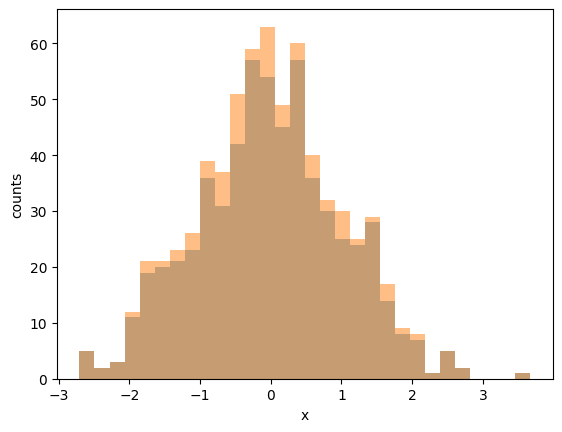

In [47]:
indeces = np.random.randint(0,1000,100)
data_nan = data.copy()
data[indeces] = np.nan
print("meand: {:.2} std: {:.2}".format(np.nanmean(data_nan), np.nanstd(data_nan)))
plt.hist(data, bins=30, alpha=0.5);
plt.hist(data_nan, bins=30, alpha=0.5);
plt.xlabel("x")
plt.ylabel("counts");

meand: -0.018 std: 0.84


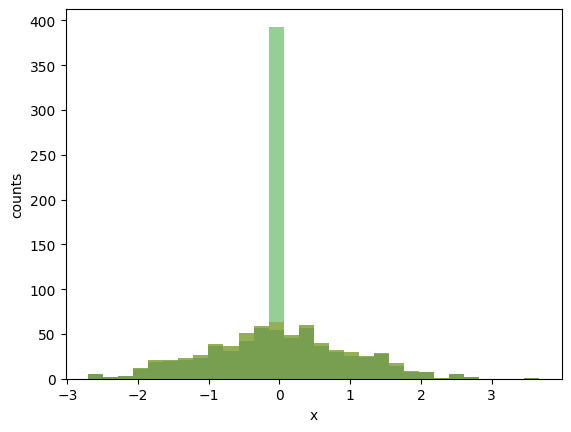

In [48]:
mean_replace = np.nanmean(data_nan)
data_filled = data_nan.copy()
data_filled[np.isnan(data_filled)] = mean_replace

print("meand: {:.2} std: {:.2}".format(np.nanmean(data_filled), np.nanstd(data_filled)))
plt.hist(data, bins=30, alpha=0.5);
plt.hist(data_nan, bins=30, alpha=0.5);
plt.hist(data_filled, bins=30, alpha=0.5);
plt.xlabel("x")
plt.ylabel("counts");